# SeaFall Results

After 10 games of play the leaderboard has a bit of history and depth. How has each player performed? How did each player reach their current total of glory?

## Visualizing Glory

The final score of each game is the only clear measure we have of player performance. We have not kept track of further gameplay details from game to game such as gold acquired, relics or tablets recovered, or number of permanent enmity on the board. This means we are limited in how we can describe the success of each player. However, visualizing the 

In [1]:
%matplotlib inline

import itertools
import matplotlib
import matplotlib.pyplot
import numpy
import pandas
import scipy.misc
import scipy.special
import scipy.stats
import seaborn
import trueskill
import xlrd

## TrueSkill

Microsoft research created a method for ranking player perfomance in multi-player games called TrueSkill. Let's apply this ranking to our game of SeaFall!

The goal of TrueSkill is to estimate a player's *skill* or ability in the game, which provides a different way of looking at the standings. The original implementation of TrueSkill was only concerned with wins, loses, and draws and did not incorporate the scoring in each game. For the free-for-all that is SeaFall the ranking of each player for each game is the input into the skill estimation. Since the ranking does not reflect the total glory accumulated throughout the game, TrueSkill will give a different way to measure and compare each player's performance.

In [2]:
df_glory = pandas.read_excel("./captains_log/glory.xlsx")
df_glory

,game_number,glory_target,dave,kyle,scott,mike,joe,dave_total,kyle_total,scott_total,...,kyle_rank,scott_rank,mike_rank,joe_rank,dave_norm,kyle_norm,scott_norm,mike_norm,joe_norm,total_glory
0,1,11,11,6,6,5,4,11,6,6,...,2,2,4,5,1.000000,0.545455,0.545455,0.454545,0.363636,32
1,2,12,6,8,10,12,9,17,14,16,...,4,2,1,3,0.500000,0.666667,0.833333,1.000000,0.750000,45
2,3,13,9,7,6,12,18,26,21,22,...,4,5,2,1,0.692308,0.538462,0.461538,0.923077,1.384615,52
3,4,14,14,14,7,2,2,40,35,29,...,1,3,4,4,1.000000,1.000000,0.500000,0.142857,0.142857,39
4,5,15,15,12,9,12,8,55,47,38,...,2,4,2,5,1.000000,0.800000,0.600000,0.800000,0.533333,56
5,6,16,14,14,20,12,12,69,61,58,...,2,1,4,4,0.875000,0.875000,1.250000,0.750000,0.750000,72
6,7,17,5,3,10,10,19,74,64,68,...,5,2,2,1,0.294118,0.176471,0.588235,0.588235,1.117647,47
7,8,18,6,6,19,7,4,80,70,87,...,3,1,2,5,0.333333,0.333333,1.055556,0.388889,0.222222,42
8,9,19,8,12,11,25,8,88,82,98,...,2,3,1,4,0.421053,0.631579,0.578947,1.315789,0.421053,64
9,10,20,7,19,9,20,20,95,101,107,...,3,4,1,1,0.350000,0.950000,0.450000,1.000000,1.000000,75


In [3]:
dave = trueskill.Rating()
kyle = trueskill.Rating()
scott = trueskill.Rating()
mike = trueskill.Rating()
joe = trueskill.Rating()



In [4]:
# demo
trueskill.quality([(dave,),(kyle,),(scott,),(mike,),(joe,)])
print(dave)
new_dave, new_kyle, new_scott, new_mike, new_joe = trueskill.rate([(dave,),(kyle,),(scott,),(mike,),(joe,)])
print(new_dave)
new_dave, new_kyle, new_scott, new_mike, new_joe = trueskill.rate([new_scott,new_kyle,new_dave,new_mike,new_joe])
print(new_dave)
new_dave, new_kyle, new_scott, new_mike, new_joe = trueskill.rate([(dave,),(kyle,),(scott,),(mike,),(joe,)], ranks=[0, 1, 1, 3, 4])
print(new_dave)

trueskill.Rating(mu=25.000, sigma=8.333)
(trueskill.Rating(mu=34.363, sigma=6.136),)
(trueskill.Rating(mu=31.387, sigma=4.344),)
(trueskill.Rating(mu=32.687, sigma=6.176),)


In [5]:
def update_glory(ratings, s_glry):
    
    new_ratings = trueskill.rate(ratings, ranks=[s_glry["dave_rank"],
                                                 s_glry["kyle_rank"],
                                                 s_glry["scott_rank"],
                                                 s_glry["mike_rank"],
                                                 s_glry["joe_rank"]])
    
    return new_ratings
    

In [6]:
x = df_glory.loc[0]

In [7]:
mu, sigma = new_dave[0]

In [8]:
df_glory.shape[0]

10

In [9]:
dave = trueskill.Rating()
kyle = trueskill.Rating()
scott = trueskill.Rating()
mike = trueskill.Rating()
joe = trueskill.Rating()

ratings = [(dave,),(kyle,),(scott,),(mike,),(joe,)]

for ind, row in df_glory.iterrows():
    
    ratings = update_glory(ratings, row)

In [10]:
df_q1 = df_glory.loc[(df_glory["game_number"] < 6)]
df_q2 = df_glory.loc[(df_glory["game_number"] > 5)]

In [11]:
dave = trueskill.Rating()
kyle = trueskill.Rating()
scott = trueskill.Rating()
mike = trueskill.Rating()
joe = trueskill.Rating()

ratings_q1 = [(dave,),(kyle,),(scott,),(mike,),(joe,)]

for ind, row in df_q1.iterrows():
    
    ratings_q1 = update_glory(ratings_q1, row)

In [12]:
dave = trueskill.Rating()
kyle = trueskill.Rating()
scott = trueskill.Rating()
mike = trueskill.Rating()
joe = trueskill.Rating()

ratings_q2 = [(dave,),(kyle,),(scott,),(mike,),(joe,)]

for ind, row in df_q2.iterrows():
    
    ratings_q2 = update_glory(ratings_q2, row)

In [13]:
def ratings_mu_sigma(rating):
    
    mu, sigma = rating
    
    return (mu, sigma)

ratings_dict = {"player":["dave", "kyle", "scott", "mike", "joe"]}
ratings_tuple_array = [ratings_mu_sigma(rating[0]) for rating in ratings]
ratings_dict["mu"] = [rating[0] for rating in ratings_tuple_array]
ratings_dict["sigma"] = [rating[1] for rating in ratings_tuple_array]
ratings_tuple_array = [ratings_mu_sigma(rating[0]) for rating in ratings_q1]
ratings_dict["mu_q1"] = [rating[0] for rating in ratings_tuple_array]
ratings_dict["sigma_q1"] = [rating[1] for rating in ratings_tuple_array]
ratings_tuple_array = [ratings_mu_sigma(rating[0]) for rating in ratings_q2]
ratings_dict["mu_q2"] = [rating[0] for rating in ratings_tuple_array]
ratings_dict["sigma_q2"] = [rating[1] for rating in ratings_tuple_array]
ratings_tuple_array = [scipy.stats.norm.interval(0.95, loc=0, scale=sigma) for sigma in ratings_dict["sigma"]]
ratings_dict["err95"] = [err[1] for err in ratings_tuple_array]
ratings_tuple_array = [scipy.stats.norm.interval(0.95, loc=0, scale=sigma) for sigma in ratings_dict["sigma_q1"]]
ratings_dict["err95_q1"] = [err[1] for err in ratings_tuple_array]
ratings_tuple_array = [scipy.stats.norm.interval(0.95, loc=0, scale=sigma) for sigma in ratings_dict["sigma_q2"]]
ratings_dict["err95_q2"] = [err[1] for err in ratings_tuple_array]

In [14]:
df_trueskill = pandas.DataFrame.from_dict(ratings_dict)
df_trueskill.set_index("player", inplace=True)

In [15]:
x = df_trueskill.index.values

In [16]:
list(x)

['dave', 'kyle', 'scott', 'mike', 'joe']

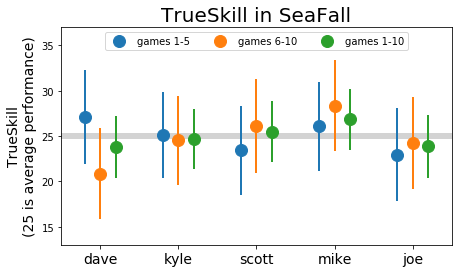

In [17]:
fig, ax = matplotlib.pyplot.subplots(figsize=(7, 4))

ax.axhline(y=25, color="lightgray", linewidth=6, zorder=0)
# standard error bars

ax.errorbar([-0.2, 0.8, 1.8, 2.8, 3.8], df_trueskill["mu_q1"], yerr=df_trueskill["err95_q1"], 
            linestyle="", linewidth=2, marker='o', markersize=12, label="games 1-5")
ax.errorbar([0, 1, 2, 3, 4], df_trueskill["mu_q2"], yerr=df_trueskill["err95_q2"], 
            linestyle="", linewidth=2, marker='o', markersize=12, label="games 6-10")
ax.errorbar([0.2, 1.2, 2.2, 3.2, 4.2], df_trueskill["mu"], yerr=df_trueskill["err95"], 
            linestyle="", linewidth=2, marker='o', markersize=12, label="games 1-10")

ax.set_xlim((-0.5, 4.5))
ax.set_ylabel("TrueSkill\n(25 is average performance)", fontsize=14)
ax.set_ylim((13, 37))
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(df_trueskill.index.values, rotation=0, fontsize=14)
ax.set_title('TrueSkill in SeaFall', fontsize=20)
ax.legend(ncol=3, fancybox=True, loc="upper center")

fig.savefig("TrueSkillResults_games_1_to_10.svg", format="svg", dpi=1200)
fig.savefig("TrueSkillResults_games_1_to_10.png", format="png", dpi=1200)

# Has anyone separated themselves from the pack (statistically)?
All the 95% confidence intervals are overlapping, but the difference between the means could be statistically significant. Let's do this pairwise for all the players, comparing the TrueSkill in games 1-10. We'll do this by calculating the difference distribution between each pair of player TrueSkill distributions. If the this difference distribution does not contain 0 with a 0.05 probability, then we'll consider the skills statistically significant.

In [18]:
trueskill_diff = numpy.zeros((5,5))

for pair in itertools.product(df_trueskill.index.values, df_trueskill.index.values):
    
    row = df_trueskill.index.get_loc(pair[0])
    
    col = df_trueskill.index.get_loc(pair[1])
    
    mu0 = df_trueskill["mu"][pair[0]]
    
    mu1 = df_trueskill["mu"][pair[1]]
    
    sigma0 = df_trueskill["sigma"][pair[0]]
    
    sigma1 = df_trueskill["sigma"][pair[1]]
    
    mudiff = numpy.abs(mu0-mu1)
    
    sigmadiff = numpy.sqrt(sigma0**2 + sigma1**2)
    
    left_tail, _ = scipy.stats.norm.interval(0.90, loc=mudiff, scale=sigmadiff)
    
    if left_tail > 0:
        # the difference is significant
        trueskill_diff[row, col] = 1
        print(pair)

In [19]:
trueskill_diff

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

After 10 games, there is no statistically significant difference between any player's TrueSkill.